<a href="https://colab.research.google.com/github/zia207/Survival_Analysis_R/blob/main/Colab_Notebook/02_07_06_06_survival_analysis_joint_frailty_modeling_r.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![All-test](http://drive.google.com/uc?export=view&id=1bLQ3nhDbZrCCqy_WCxxckOne2lgVvn3l)

# 6.6 Joint Frailty Models For Recurrent and Terminal Events


Joint frailty models extend standard frailty models by simultaneously analyzing two or more related survival processes, typically recurrent events (e.g., repeated hospitalizations or tumor recurrences) and a terminal event (e.g., death), which censors the recurrent process. These models account for the dependence between the processes through shared or correlated frailty terms, addressing informative censoring where the terminal event is influenced by the same unobserved heterogeneity as the recurrent events. Without joint modeling, separate analyses may lead to biased estimates because the terminal event is not independent of the recurrent process.

In many studies, recurrent events are observed until a terminal event occurs, and these processes are correlated due to shared unobserved factors (e.g., frailty-prone individuals may have more recurrences and die earlier). Joint models capture this by linking the hazards via frailties, improving efficiency and reducing bias from ignoring dependence.

- **Frailty Role**: Frailties are random effects representing unobserved heterogeneity. In joint models, a shared frailty (e.g., $u_i$ for individual $i$ multiplies the baseline hazards of both processes, inducing positive correlation. Correlated frailties allow for more flexible dependence, including negative correlations.

- **Effects**:

  - **Selection and Dependence**: Frailer individuals experience events faster and may exit via the terminal event, leading to a healthier survivor population over time.
  
  - **Informative Censoring**: Models explicitly handle cases where censoring (terminal event) depends on frailty, unlike standard models assuming independent censoring.
  
  - **Association Parameter**: Often includes a parameter (e.g., $\alpha$)) scaling the frailty's impact on the terminal hazard, quantifying the strength of association between processes.


## Joint Frailty model


Fit a joint either with gamma or log-normal frailty model for recurrent and terminal events using a penalized likelihood estimation on the hazard function or a parametric estimation. Right-censored data and strata (up to 6 levels) for the recurrent event part are allowed. Left-truncated data is not possible. Joint frailty models allow studying, jointly, survival processes of recurrent and terminal events, by considering the terminal event as an informative censoring.

There is two kinds of joint frailty models that can be fitted with `frailtyPenal`:

- The first one (Rondeau et al. 2007) includes a common frailty term to the individuals $\omega_i$ for the two rates which will take into account the heterogeneity in the data, associated with unobserved covariates. The frailty term acts differently for the two rates ($\omega_i$ for the recurrent rate and $\omega_i^{\text{exp}(\text{alpha})}$ for the death rate). The covariates could be different for the recurrent rate and death rate.

For the $j^{th}$ recurrence ($j$=1,...,N) and the $i^{th}$ subject ($i$=1,...,G), the joint gamma frailty model for recurrent event hazard function $r_{ij}(t)$ and death rate $\lambda_i$ is:

$$
\begin{cases}
r_{ij}(t|\omega_i) = \omega_i r_0(t) \exp(\beta_1' Z_{1i}(t)) & \text{(Recurrent)} \\
\lambda_i(t|\omega_i) = \omega_i^\alpha \lambda_0(t) \exp(\beta_2' Z_{2i}(t)) & \text{(Death)}
\end{cases}
$$

where $r_0(t)$ (resp. $\lambda_0(t)$) is the recurrent (resp. terminal) event baseline hazard function, $\beta_1$ (resp. $\beta_2$) the regression coefficient vector. $Z_{1i}(t)$ the covariate vector. The random effects of frailties $\omega_i \sim \Gamma(1/\theta, 1/\theta)$ and are iid.

The joint log-normal frailty model will be:

$$
\begin{cases}
r_{ij}(t|\eta_i) = r_0(t) \exp(\eta_i + \beta_1' Z_{1i}(t)) & \text{(Recurrent)} \\
\lambda_i(t|\eta_i) = \lambda_0(t) \exp(\alpha\eta_i + \beta_2' Z_{2i}(t)) & \text{(Death)}
\end{cases}
$$

$$ \eta_i \sim N(0, \sigma^2) $$

- The second one (Rondeau et al. 2011) is quite similar but the frailty term is common to the individuals from a same group. This model is useful for the joint modelling two clustered survival outcomes. This joint models have been developed for clustered semi-competing events. The follow-up of each of the two competing outcomes stops when the event occurs. In this case, $j$ is for the subject and $i$ for the cluster.

$$
\begin{cases}
r_{ij}(t|u_i) = u_i r_0(t) \exp(\beta_1' Z_{1ij}(t)) & \text{(Time to event)} \\
\lambda_{ij}(t|u_i) = u_i^\alpha \lambda_0(t) \exp(\beta_2' Z_{2ij}(t)) & \text{(Death)}
\end{cases}
$$

It should be noted that in these models it is not recommended to include $\alpha$ parameter as there is not enough information to estimate it and thus there might be convergence problems.


In case of a log-normal distribution of the frailties, we will have:

$$
\begin{cases}
r_{ij}(t|v_i) = r_0(t) \exp(v_i + \beta_1' Z_{1ij}(t)) & \text{(Time to event)} \\
\lambda_{ij}(t|v_i) = \lambda_0(t) \exp(\alpha v_i + \beta_2' Z_{2ij}(t)) & \text{(Death)}
\end{cases}
$$

$$ v_i \sim N(0, \sigma^2) $$

This joint frailty model can also be applied to clustered recurrent events and a terminal event (example on "readmission" data below).

From now on, you can also consider time-varying effects covariates in your model, see `timedep` function for more details.

There is a possibility to use a weighted penalized maximum likelihood approach for nested case-control design, in which risk set sampling is performed based on a single outcome (Jazic et al., *Submitted*).



## Joint Nested Frailty Model


Fit a joint model for recurrent and terminal events using a penalized likelihood on the hazard functions or a parametric estimation. Right-censored data are allowed but left-truncated data and stratified analysis are not allowed.

Joint nested frailty models allow studying, jointly, survival processes of recurrent and terminal events for hierarchically clustered data, by considering the terminal event as an informative censoring and by including two iid gamma random effects.

The joint nested frailty model includes two shared frailty terms, one for the subgroup ($u_k$) and one for the group ($w_l$) into the hazard functions. This random effects account the heterogeneity in the data, associated with unobserved covariates. The frailty terms act differently for the two rates ($u_k w_l^{\text{exp}(\text{alpha})}$ for the recurrent rate and $u_k w_l^{\text{exp}(\text{alpha})}$ for the terminal event rate). The covariates could be different for the recurrent rate and death rate.

For the $j^{th}$ recurrence ($j=1, ..., n_k$) of the $i^{th}$ individual ($i=1, ..., m_l$) of the $k^{th}$ group ($k=1, ..., n$), the joint nested gamma frailty model for recurrent event hazard function $r_{lij}(t)$ and for terminal event hazard function $\lambda_{li}$ is:

$$
\begin{cases}
r_{lij}(t|w_l, u_k, X_{lij}) = r_0(t) u_k w_l^\beta \exp(\beta' X_{lij}) & \text{(Recurrent)} \\
\lambda_{li}(t|w_l, u_k, X_{li}) = \lambda_0(t) u_k w_l^\gamma \exp(\gamma' X_{li}) & \text{(Death)}
\end{cases}
$$

where $r_0(\text{resp. } \lambda_0)$ is the recurrent (resp. terminal) event baseline hazard function, $\beta$ (resp. $\gamma$) the regression coefficient vector. $X_{lij}(t)$ the covariates vector. The random effects are $w_l \sim \Gamma(1/\eta, 1/\eta)$ and $u_k \sim \Gamma(1/\theta, 1/\theta)$.



## Setup R in Python Runtype - Install {rpy2}
{rpy2} is a Python package that provides an interface to the R programming language, allowing Python users to run R code, call R functions, and manipulate R objects directly from Python. It enables seamless integration between Python and R, leveraging R's statistical and graphical capabilities while using Python's flexibility. The package supports passing data between the two languages and is widely used for statistical analysis, data visualization, and machine learning tasks that benefit from R's specialized libraries.

In [ ]:
!pip uninstall rpy2 -y
!pip install rpy2==3.5.1
%load_ext rpy2.ipython

Found existing installation: rpy2 3.5.1
Uninstalling rpy2-3.5.1:
  Successfully uninstalled rpy2-3.5.1
  Using cached rpy2-3.5.1-cp312-cp312-linux_x86_64.whl


## Mount Google Drive

In [ ]:
## Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Joint Frailty Models  in R


{frailtypack} is an R package for fitting frailty models (shared, nested, joint, additive) to correlated survival data** with **recurrent** and **terminal events**. It uses penalized likelihood with splines  or parametric hazards, supports time-varying covariates, and enables prediction.  



### Install Required R Packages


Following R packages are required to run this notebook. If any of these packages are not installed, you can install them using the code below:


In [ ]:
%%R
packages <-c(
		 'tidyverse',
	   'JMbayes2',
		 'frailtypack'
		 )


### Install missing packages

In [ ]:
%%R
# Install missing packages
new.packages <- packages[!(packages %in% installed.packages(lib='drive/My Drive/R/')[,"Package"])]
if(length(new.packages)) install.packages(new.packages, lib='drive/My Drive/R/')
devtools::install_github("ItziarI/WeDiBaDis", lib='drive/My Drive/R/')


In [ ]:
%%R
.libPaths('drive/My Drive/R')
# Verify installation
cat("Installed packages:\n")
print(sapply(packages, requireNamespace, quietly = TRUE))

Installed packages:
  tidyverse    JMbayes2 frailtypack 
       TRUE        TRUE        TRUE 


### Load Packages

In [ ]:
%%R
# Load packages with suppressed messages
invisible(lapply(packages, function(pkg) {
  suppressPackageStartupMessages(library(pkg, character.only = TRUE))
}))

In [ ]:
%%R
# Check loaded packages
cat("Successfully loaded packages:\n")
print(search()[grepl("package:", search())])

Successfully loaded packages:
 [1] "package:frailtypack"  "package:survC1"       "package:MASS"        
 [4] "package:doBy"         "package:boot"         "package:JMbayes2"    
 [7] "package:splines"      "package:GLMMadaptive" "package:nlme"        
[10] "package:survival"     "package:lubridate"    "package:forcats"     
[13] "package:stringr"      "package:dplyr"        "package:purrr"       
[16] "package:readr"        "package:tidyr"        "package:tibble"      
[19] "package:ggplot2"      "package:tidyverse"    "package:tools"       
[22] "package:stats"        "package:graphics"     "package:grDevices"   
[25] "package:utils"        "package:datasets"     "package:methods"     
[28] "package:base"        


### Data


This tutorial uses the `readmission` dataset from the `frailtypack` package, which includes 403 patients post-colorectal cancer surgery with recurrent re-hospitalizations (up to 4) and overall survival (terminal event). Columns: `id` (patient ID), `t.start`/`t.stop` (interval times), `event` (recurrence indicator), `enum` (event number), `time` (gap time to recurrence), `dukes` (tumor stage), `charlson` (comorbidity), `sex` (1=male), `chemo` (chemotherapy), `death` (terminal indicator).



In [ ]:
%%R
data(readmission)
# Structure
str(readmission)
# Summary
summary(readmission)

'data.frame':	861 obs. of  11 variables:
 $ id      : int  1 1 1 2 2 3 3 4 4 4 ...
 $ enum    : int  1 2 3 1 2 1 2 1 2 3 ...
 $ t.start : int  0 24 457 0 489 0 15 0 163 288 ...
 $ t.stop  : int  24 457 1037 489 1182 15 783 163 288 638 ...
 $ time    : int  24 433 580 489 693 15 768 163 125 350 ...
 $ event   : int  1 1 0 1 0 1 0 1 1 1 ...
 $ chemo   : Factor w/ 2 levels "NonTreated","Treated": 2 2 2 1 1 1 1 2 2 2 ...
 $ sex     : Factor w/ 2 levels "Male","Female": 2 2 2 1 1 1 1 2 2 2 ...
 $ dukes   : Factor w/ 3 levels "A-B","C","D": 3 3 3 2 2 2 2 1 1 1 ...
 $ charlson: Factor w/ 3 levels "0","1-2","3": 3 1 1 1 1 3 3 1 1 1 ...
 $ death   : num  0 0 0 0 0 0 1 0 0 0 ...
       id             enum           t.start           t.stop      
 Min.   :  1.0   Min.   : 1.000   Min.   :   0.0   Min.   :   1.0  
 1st Qu.:114.0   1st Qu.: 1.000   1st Qu.:   0.0   1st Qu.: 206.0  
 Median :214.0   Median : 2.000   Median :  25.0   Median : 607.0  
 Mean   :210.6   Mean   : 2.641   Mean   : 254.5  

In [ ]:
%%R
# Number of patients, recurrences, deaths
length(unique(readmission$id))  # 403 patients
sum(readmission$event)  # 467 recurrences
sum(readmission$death)  # Deaths (terminal)

[1] 109


### Data Visualization

In [ ]:
%%R
# 1. Distribution of number of recurrences per patient
recurrence_counts <- readmission %>%
  group_by(id) %>%
  summarise(n_recurrences = sum(event))

ggplot(recurrence_counts, aes(x = n_recurrences)) +
  geom_histogram(
    binwidth = 1,
    center = 0.5,           # makes bars centered on integers
    fill = "steelblue",
    color = "white"
  ) +
  scale_x_continuous(breaks = seq(0, max(recurrence_counts$n_recurrences), by = 1)) +
  labs(
    x = "Number of Recurrences per Patient",
    y = "Number of Patients",
    title = "Distribution of Recurrent Events per Patient"
  ) +
  theme_minimal(base_size = 12) +
  theme(
    panel.grid.minor = element_blank()
  )

# 2. Distribution of survival (terminal event) times
ggplot(filter(readmission, death == 1), aes(x = t.stop)) +
  geom_histogram(bins = 25, fill = "tomato", color = "white") +
  labs(
    x = "Time to Terminal Event (death)",
    y = "Number of Patients",
    title = "Distribution of Time to Terminal Event"
  ) +
  theme_minimal(base_size = 12)

# 3. Distribution of gap times (to recurrence)
ggplot(filter(readmission, event == 1), aes(x = time)) +
  geom_histogram(bins = 25, fill = "#2ca02c", color = "white") +
  labs(
    x = "Gap Time to Recurrence",
    y = "Number of Recurrences",
    title = "Distribution of Gap Times (to Recurrence)"
  ) +
  theme_minimal(base_size = 12)

### Fitting Joint Frailty Models


Joint frailty models simultaneously analyze **recurrent events** (e.g., hospitalizations) and a **terminal event** (e.g., death), accounting for **dependence** via shared or nested **random effects (frailties)**. Using the `readmission` dataset, this tutorial demonstrates:

- **General Joint Model** (two frailties)  
- **Standard Joint Model** (with/without α, log-normal frailty)  
- **Joint Nested Model** (hierarchical clustering)  

We cover **gap time** and **calendar time** formulations, plus **model diagnostics** (AIC, residuals, prediction).  



### General Joint Frailty Model


We first fit a **General Joint Frailty Model** with gamma frailty for both recurrent and terminal events, using **gap time** (PWP-type) and Calendar Time (Andersen-Gill-type) data. These models include a shared frailty term affecting both processes, capturing unobserved heterogeneity.


#### Gap Time (PWP-type)


Gap time models reset the time scale after each event, focusing on intervals between recurrences. This is suitable when the risk of recurrence depends on the number of prior events.


In [ ]:
%%R
# General Joint (Gap Time)
fit_gen_gap <- frailtyPenal(
  # Recurrent part – MUST include cluster()
  Surv(time,event)~cluster(id)+sex+dukes+charlson+terminal(death),
  # Terminal part
  formula.terminalEvent=~sex+dukes+charlson,
  data=readmission,
  n.knots=14,
  kappa=c(9.55e+9,1.41e+12),
  recurrentAG=FALSE)
summary(fit_gen_gap)


Be patient. The program is computing ... 
The program took 33.44 seconds 
Recurrences:
------------- 
                 HR     95%     C.I. 
   sexFemale   0.60 (   0.46 -   0.78 ) 
      dukesC   1.50 (   1.07 -   2.10 ) 
      dukesD   3.56 (   2.52 -   5.02 ) 
 charlson1-2   1.48 (   0.80 -   2.76 ) 
   charlson3   1.54 (   1.17 -   2.03 ) 

Terminal event:
--------------- 
                 HR     95%     C.I. 
   sexFemale   0.72 (   0.45 -   1.17 ) 
      dukesC   2.50 (   1.31 -   4.77 ) 
      dukesD  15.36 (   7.57 -  31.17 ) 
 charlson1-2   2.06 (   0.69 -   6.19 ) 
   charlson3   3.05 (   1.83 -   5.09 ) 

There is significant unobserved heterogeneity among subjects (frailty
variance theta = 0.7251, p = < 0.001).

The association parameter alpha is significantly different from zero
(alpha = 0.7368, p = 0.0078).  Hence, a higher risk of recurrent events
is associated with a higher risk of terminal event (alpha > 0).



#### Calendar Time (Andersen-Gill-type)


Calendar time models use the original time scale, allowing risk to accumulate over the entire follow-up period. This is appropriate when the risk of recurrence depends on absolute time since study entry.



In [ ]:
%%R
fit_gen_cal<-frailtyPenal(
  # Recurrent part – MUST include cluster()
  Surv(t.start,t.stop,event)~cluster(id)+sex+dukes+charlson+terminal(death),
  # Terminal part
  formula.terminalEvent=~sex+dukes+charlson,
  data=readmission,
  n.knots=10,
  kappa=c(9.55e9,1.41e12),
  recurrentAG=TRUE)
summary(fit_gen_cal)


Be patient. The program is computing ... 
The program took 24.64 seconds 
Recurrences:
------------- 
                 HR     95%     C.I. 
   sexFemale   0.55 (   0.40 -   0.76 ) 
      dukesC   1.53 (   1.03 -   2.28 ) 
      dukesD   4.79 (   2.89 -   7.93 ) 
 charlson1-2   1.63 (   0.71 -   3.74 ) 
   charlson3   1.81 (   1.27 -   2.57 ) 

Terminal event:
--------------- 
                 HR     95%     C.I. 
   sexFemale   0.71 (   0.44 -   1.15 ) 
      dukesC   2.48 (   1.32 -   4.68 ) 
      dukesD  14.75 (   7.37 -  29.50 ) 
 charlson1-2   2.05 (   0.69 -   6.08 ) 
   charlson3   3.06 (   1.83 -   5.13 ) 

There is significant unobserved heterogeneity among subjects (frailty
variance theta = 0.9761, p = < 0.001).

The association parameter alpha is significantly different from zero
(alpha = 0.5746, p = 0.0030).  Hence, a higher risk of recurrent events
is associated with a higher risk of terminal event (alpha > 0).



### Standard Joint Frailty Model (No $\alpha$, Log-Normal Frailty)


We next fit a **Standard Joint Frailty Model** with options for including/excluding the association parameter $\alpha$ and using a log-normal frailty distribution. This model captures dependence between recurrent and terminal events via a shared frailty term.



In [ ]:
%%R
fit_std_gap_noalpha_logn <- frailtyPenal(
  Surv(time, event) ~ cluster(id)+sex+dukes+charlson+terminal(death),
  formula.terminalEvent = ~ sex+dukes+charlson,
  data = readmission,
  recurrentAG = FALSE,
  RandDist = "LogN",
  Alpha = "None",        # No alpha
  n.knots = 10,
  kappa = c(1e9, 1e10)
)
summary(fit_std_gap_noalpha_logn)


Be patient. The program is computing ... 
The program took 4.38 seconds 
Recurrences:
------------- 
                 HR     95%     C.I. 
   sexFemale   0.62 (   0.48 -   0.81 ) 
      dukesC   1.52 (   1.10 -   2.11 ) 
      dukesD   4.22 (   2.84 -   6.27 ) 
 charlson1-2   1.40 (   0.79 -   2.47 ) 
   charlson3   1.44 (   1.05 -   1.97 ) 

Terminal event:
--------------- 
                 HR     95%     C.I. 
   sexFemale   0.73 (   0.44 -   1.21 ) 
      dukesC   2.54 (   1.29 -   4.98 ) 
      dukesD  20.09 (   9.58 -  42.14 ) 
 charlson1-2   2.05 (   0.68 -   6.17 ) 
   charlson3   2.80 (   1.62 -   4.82 ) 

There is significant unobserved heterogeneity among subjects (frailty
variance sigma2 = 0.6288, p = < 0.001).

The association parameter was fixed (alpha = 1). A higher risk of
recurrent events is associated with a higher risk of terminal event.



#### Calendar Time (Andersen-Gill-type)

In [ ]:
%%R
fit_std_cal_logn <- frailtyPenal(
  Surv(t.start, t.stop, event) ~ cluster(id)+sex+dukes+charlson+terminal(death),
  formula.terminalEvent = ~ sex+dukes+charlson,
  data = readmission,
  recurrentAG = TRUE,
  RandDist = "LogN",
  n.knots = 8,
  kappa = c(1e8, 1e9)
)
summary(fit_std_cal_logn)


Be patient. The program is computing ... 
The program took 4.3 seconds 
Recurrences:
------------- 
                 HR     95%     C.I. 
   sexFemale   0.58 (   0.42 -   0.80 ) 
      dukesC   1.58 (   1.06 -   2.35 ) 
      dukesD   5.98 (   3.55 -  10.08 ) 
 charlson1-2   1.41 (   0.64 -   3.12 ) 
   charlson3   1.64 (   1.08 -   2.50 ) 

Terminal event:
--------------- 
                 HR     95%     C.I. 
   sexFemale   0.72 (   0.44 -   1.18 ) 
      dukesC   2.52 (   1.38 -   4.60 ) 
      dukesD  17.28 (   8.53 -  35.02 ) 
 charlson1-2   2.00 (   0.68 -   5.83 ) 
   charlson3   2.84 (   1.69 -   4.78 ) 

There is significant unobserved heterogeneity among subjects (frailty
variance sigma2 = 1.2482, p = < 0.001).

The association parameter alpha is significantly different from zero
(alpha = 0.6191, p = 0.0013).  Hence, a higher risk of recurrent events
is associated with a higher risk of terminal event (alpha > 0).



#### Joint Nested Frailty Model

In [ ]:
%%R
# Joint Nested (Gap Time)
readmission$group <- (readmission$id - 1) %/% 10 + 1
fit_nest_gap <- frailtyPenal(
  Surv(time, event) ~ cluster(group) + subcluster(id) + dukes + chemo + terminal(death),
  formula.terminalEvent = ~ dukes + chemo,
  data = readmission,
  recurrentAG = FALSE,
  n.knots = 2,
  maxit = 200, # Increased maxit for better convergence
  kappa = c(1e9, 1e10),
  initialize = TRUE
)
summary(fit_nest_gap)

### Model Diagnostics

#### Frailty Distribution

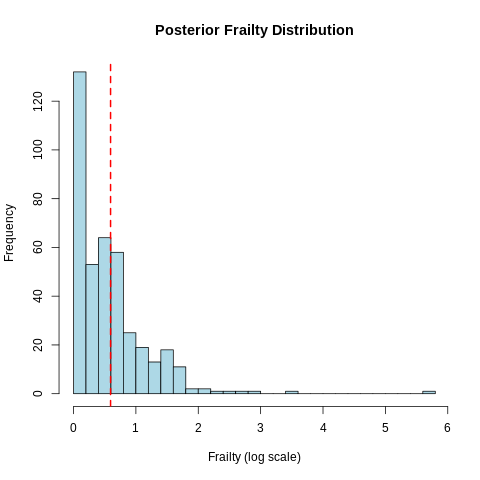

In [ ]:
%%R
# Empirical Bayes frailty estimates
frailty_eb <- fit_gen_gap$frailty.pred

# Histogram
hist(frailty_eb, main = "Posterior Frailty Distribution", xlab = "Frailty (log scale)",
     breaks = 30, col = "lightblue", border = "black")
abline(v = mean(frailty_eb), col = "red", lwd = 2, lty = 2)


####  Baseline Hazard & Survival Functions

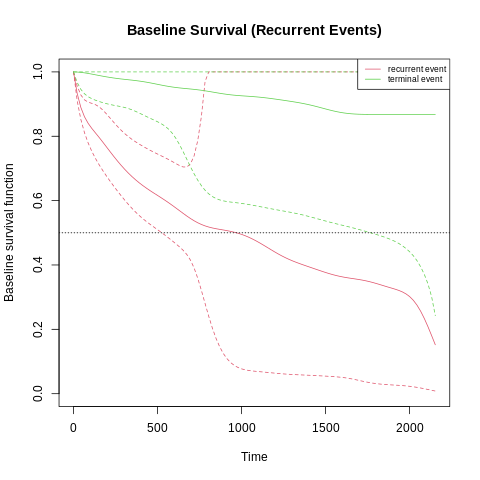

In [ ]:
%%R
# Extract and plot baseline survival (recurrent)
plot(fit_gen_gap, type.plot = "Survival", conf.bands = TRUE,
     main = "Baseline Survival (Recurrent Events)")


####  Proportional Hazards Check (Schoenfeld-like)

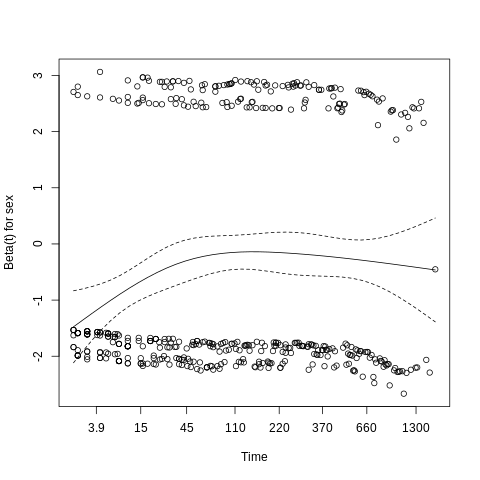

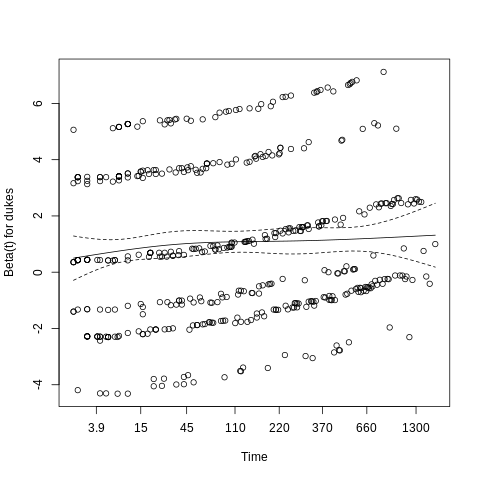

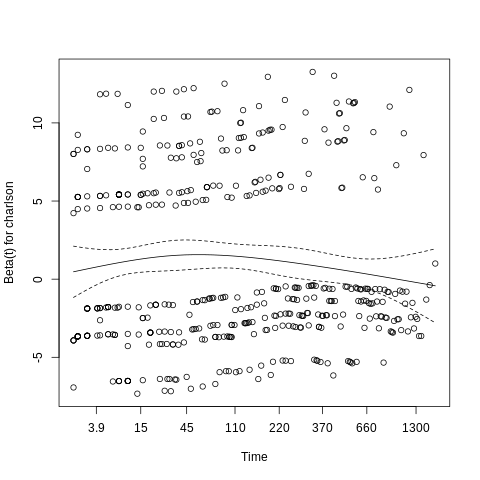

In [ ]:
%%R
# For recurrent model (approximate)
library(survival)
cox_rec <- coxph(Surv(time, event) ~ sex+dukes+charlson, data = readmission)
plot(cox.zph(cox_rec))  # Not perfect, but gives idea

## Summary and Conclusion


Joint frailty models provide a powerful framework for analyzing correlated survival processes, such as recurrent events censored by a terminal event, by incorporating shared or correlated random effects to model dependence and heterogeneity. They outperform separate or standard frailty models by addressing informative censoring, yielding unbiased estimates, and quantifying process associations via parameters like \( \alpha \). In the readmission example, the model revealed that factors like tumor stage and comorbidity increase both re-hospitalization and mortality risks, with significant positive linkage between processes.

Joint frailty models are crucial in survival analysis for realistic modeling of complex data structures, enhancing interpretability in clinical and epidemiological contexts where events are interdependent. They mitigate biases from ignored correlations but require careful assumption checks (e.g., frailty distribution) and computational resources. Compared to multi-state models, they emphasize unobserved heterogeneity over state transitions, making them ideal for frailty-driven dependence. Future extensions, like time-varying frailties, offer even greater flexibility.


##  Resources


- **Tutorial Paper: A Tutorial on Frailty Models** by Theodor A. Balan and Hein Putter (2020). Covers joint frailty extensions for recurrent and terminal events.
- **R Package Documentation: frailtypack** (CRAN). Comprehensive for fitting joint frailty models; see vignette for examples.
- **Blog Post: Joint Frailty Models for Recurrent and Terminal Events** by Red Door Analytics. Practical guide with formulations and interpretation.
- **Paper: An Introduction to Frailty Models for Multivariate Survival Data** (2018). Discusses joint models for recurrent and terminal events.
- **Book/Paper: Frailty Models in Survival Analysis** by Andreas Wienke (2010). In-depth on joint and correlated frailties.

*Based on the official `frailtypack::frailtyPenal` documentation*  
[https://search.r-project.org/CRAN/refmans/frailtypack/html/frailtyPenal.html](https://search.r-project.org/CRAN/refmans/frailtypack/html/frailtyPenal.html)

1. **Rondeau, V., et al. (2007).**  
   *Joint frailty models for recurring events and death using maximum penalized likelihood estimation.*  
   *Biometrics*, 63(4), 1057–1066.

2. **Rondeau, V., et al. (2011).**  
   *Joint modeling of two clustered survival outcomes.*  
   *Lifetime Data Analysis*.